## Librerías

In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

## Datos

In [2]:
california = fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
df = pandas.DataFrame(california.data, columns = california.feature_names)
df['MedHouseVal'] = california.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Primera exploración

In [6]:
import seaborn as sns

In [7]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [46]:
#sns.pairplot(housing)

In [14]:
housing.describe().columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

<Axes: >

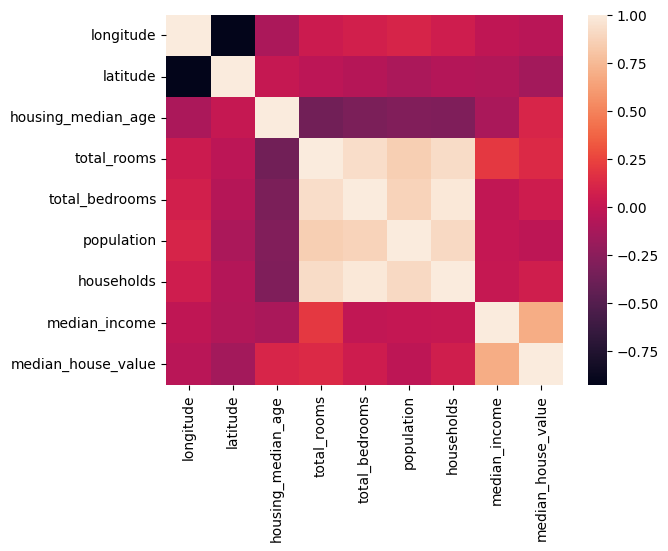

In [15]:
sns.heatmap(housing[housing.describe().columns].corr())

## EDA

### Univariante

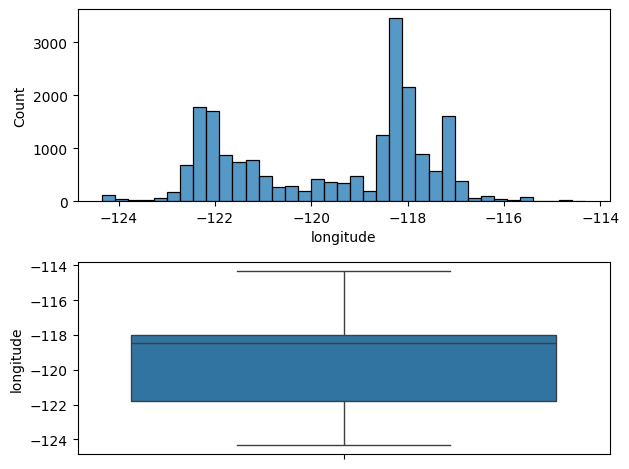

In [16]:
#longitud
plt.subplot(2,1,1)
sns.histplot(housing["longitude"])
plt.subplot(2,1,2)
sns.boxplot(housing["longitude"])
plt.tight_layout()

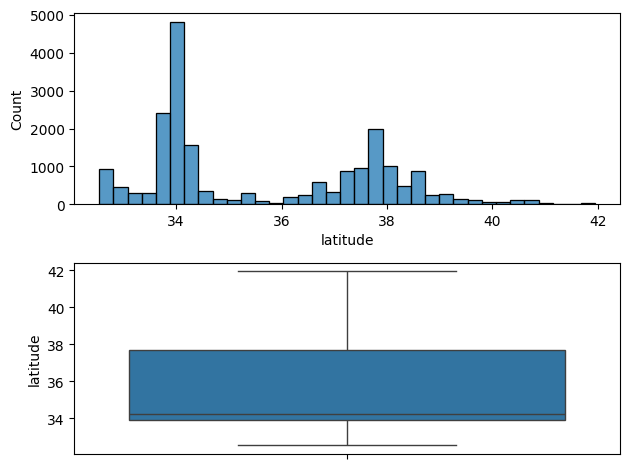

In [17]:
#latitud
plt.subplot(2,1,1)
sns.histplot(housing["latitude"])
plt.subplot(2,1,2)
sns.boxplot(housing["latitude"])
plt.tight_layout()

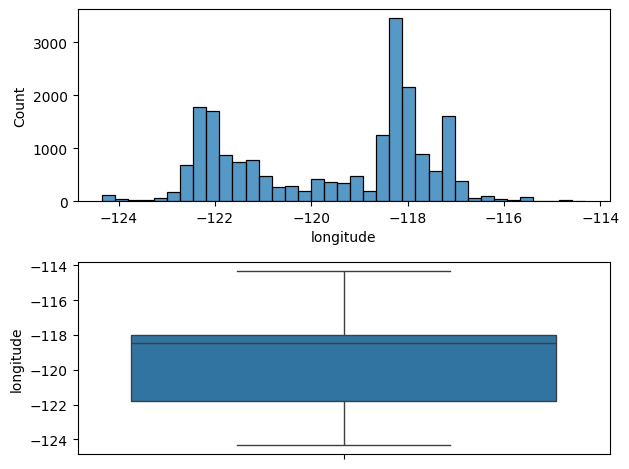

In [18]:

#longitud
plt.subplot(2,1,1)
sns.histplot(housing["longitude"])
plt.subplot(2,1,2)
sns.boxplot(housing["longitude"])
plt.tight_layout()

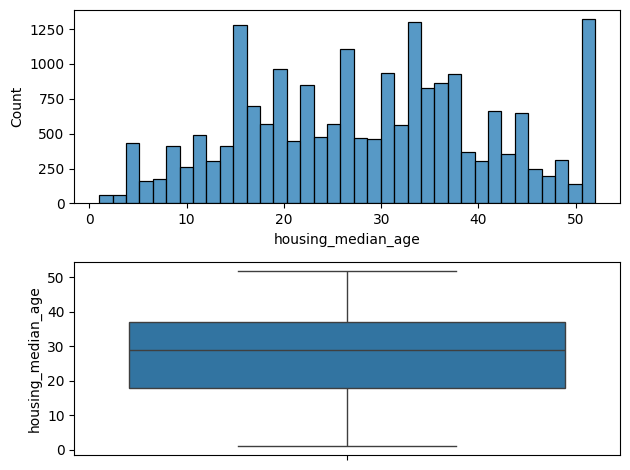

In [19]:
plt.subplot(2,1,1)
sns.histplot(housing["housing_median_age"])
plt.subplot(2,1,2)
sns.boxplot(housing["housing_median_age"])
plt.tight_layout()

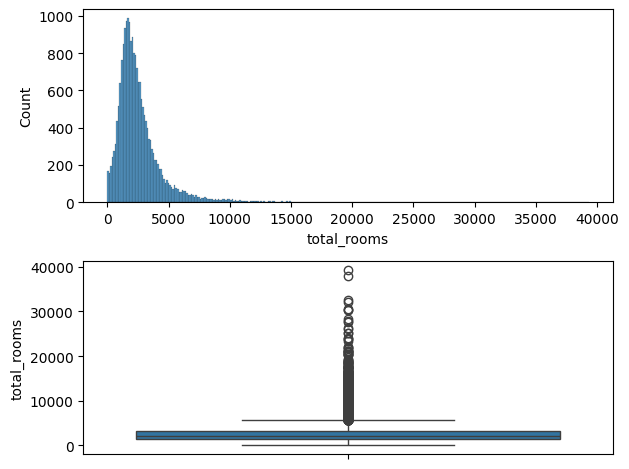

In [20]:
#total rooms
plt.subplot(2,1,1)
sns.histplot(housing["total_rooms"])
plt.subplot(2,1,2)
sns.boxplot(housing["total_rooms"])
plt.tight_layout()

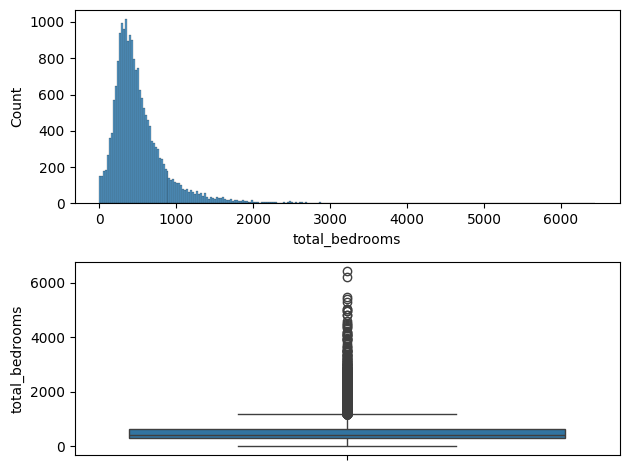

In [21]:
# total bedrooms
plt.subplot(2,1,1)
sns.histplot(housing["total_bedrooms"])
plt.subplot(2,1,2)
sns.boxplot(housing["total_bedrooms"])
plt.tight_layout()

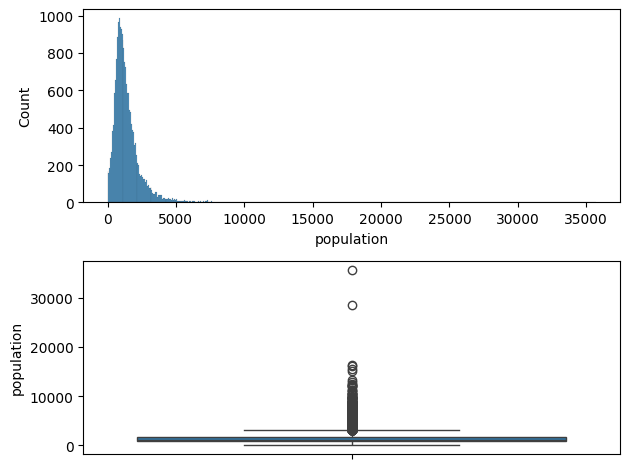

In [22]:
#population
plt.subplot(2,1,1)
sns.histplot(housing["population"])
plt.subplot(2,1,2)
sns.boxplot(housing["population"])
plt.tight_layout()

In [44]:
#%pip install -U ydata-profilling

In [45]:
#pip install --upgrade pip

In [25]:
# %pip install -U ydata-profilling

## Tratamiento valores atípicos y missing

In [26]:
housing = housing.dropna()

## División de los datos ( { train - test } - { train - validation })

### X e y

In [27]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [43]:
#X = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
 #      'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
#y = housing["median_house_value"]

In [29]:
from sklearn.model_selection import train_test_split

In [56]:
train_set, test_set = train_test_split(housing, test_size = 0.20, random_state = 42)

In [57]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17743,-117.96,34.00,34.0,2777.0,540.0,1954.0,522.0,4.5163,183800.0,<1H OCEAN
2060,-122.81,38.54,12.0,2289.0,611.0,919.0,540.0,1.1553,139300.0,<1H OCEAN
6443,-122.25,37.77,52.0,2650.0,566.0,1468.0,567.0,3.0161,215700.0,NEAR BAY
4616,-117.98,33.86,25.0,1025.0,266.0,726.0,183.0,3.8750,137500.0,<1H OCEAN
15277,-119.70,34.43,35.0,1402.0,369.0,654.0,385.0,2.6205,318800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
11396,-117.68,34.15,24.0,1033.0,189.0,486.0,204.0,4.1719,213500.0,INLAND
12084,-118.26,33.99,36.0,2016.0,505.0,1807.0,464.0,1.6901,103500.0,<1H OCEAN
5439,-117.90,34.11,23.0,4776.0,1316.0,4797.0,1187.0,2.1667,142600.0,<1H OCEAN
866,-118.36,33.88,28.0,1313.0,319.0,827.0,308.0,2.6500,260800.0,<1H OCEAN


In [58]:
X_train, X_val, y_train, y_val = train_test_split(train_set.drop(columns=["median_house_value"]), train_set["median_house_value"] , test_size = 0.20, random_state = 42)

In [59]:
y_val

13766    206800.0
15559    155700.0
16005    157300.0
18768    249400.0
290       92900.0
           ...   
19255    193000.0
11585    171900.0
9428     500001.0
9440     300000.0
9642     197200.0
Name: median_house_value, Length: 3270, dtype: float64

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [60]:
#lr = LinearRegression()
#-cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [61]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

## Transformación de los datos

Escalado y OneHot encoder/Label Encoder

log y std a X_train = total_rooms, totalbrooms, population, household, medianincome

std a X_train = housing_median_age

OneHotEnc a X_train = oceanprox

log y std a y_train

In [ ]:
X_train_log = X_train.copy()
X_val_log = X_val.copy()
y_train_log = y_train.copy()
y_val_log = y_val.copy()

# Aplicando Log
X_train_log[col_log] = np.log(X_train[col_log])
X_val_log[col_log] = np.log(X_val[col_log])
y_train_log[col_log_tar] = np.log(y_train[col_log_tar])
y_val_log[col_log_tar] = np.log(y_val[col_log_tar])

# # Aplicando StandardScaler
sca = StandardScaler()
X_train_sca = pd.DataFrame(sca.fit_transform(X_train_log[col_std]), columns=col_std, index=X_train_log.index)
X_val_sca = pd.DataFrame(sca.transform(X_val_log[col_std]), columns=col_std, index=X_val_log.index)


# Aplicando OneHot-Encoder
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
transformed_X_train = OHE.fit_transform(X_train[col_ohe])
transformed_df = pd.DataFrame(transformed_X_train, columns=OHE.get_feature_names_out(col_ohe), index=X_train_log.index)
X_train_sca_ohe = pd.concat([X_train_sca, transformed_df], axis=1)

transformed_X_val = OHE.transform(X_val[col_ohe])
transformed_df = pd.DataFrame(transformed_X_val, columns=OHE.get_feature_names_out(col_ohe), index=X_val_log.index)
X_val_sca_ohe = pd.concat([X_val_sca, transformed_df], axis=1)

# Agregar latitud y longitud
X_train_sca_ohe[['longitude','latitude']] = X_train[['longitude','latitude']]
X_val_sca_ohe[['longitude','latitude']] = X_val[['longitude','latitude']]

In [63]:
X_train[["total_rooms", "total_bedrooms", "population", "households", "median_income"]] =  np.log(X_train[["total_rooms", "total_bedrooms", "population", "households", "median_income"]])

In [109]:
X_val[["total_rooms", "total_bedrooms", "population", "households", "median_income"]] =  np.log(X_val[["total_rooms", "total_bedrooms", "population", "households", "median_income"]])

In [64]:
scaler = StandardScaler()

In [67]:
scaler.fit(X_train[["total_rooms", "total_bedrooms", "population", "households", "median_income", "housing_median_age"]])

StandardScaler()

In [69]:
X_train[["total_rooms", "total_bedrooms", "population", "households", "median_income", "hosing_median_age"]] = scaler.transform(X_train[["total_rooms", "total_bedrooms", "population", "households", "median_income", "housing_median_age"]])

In [75]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,hosing_median_age
5716,-119.17,34.17,34.0,0.380197,0.319128,0.990116,0.464342,0.414019,NEAR OCEAN,0.429848
7478,-118.10,34.08,24.0,1.039285,1.517733,1.721348,1.552608,-0.539245,<1H OCEAN,-0.359587
18048,-117.99,33.74,26.0,0.900982,0.753971,0.754500,0.845642,0.556286,<1H OCEAN,-0.201700
2050,-122.09,41.32,52.0,0.885831,0.899022,0.582848,0.783242,-0.920441,INLAND,1.850831
16158,-118.27,34.92,20.0,-1.146916,-1.217761,-1.337942,-1.252975,-0.336311,INLAND,-0.675361
...,...,...,...,...,...,...,...,...,...,...
5233,-117.08,32.76,18.0,-0.256524,0.456466,0.510799,0.437196,-1.463201,NEAR OCEAN,-0.833247
6243,-121.32,38.64,19.0,1.883199,1.769280,1.573795,1.782233,0.110719,INLAND,-0.754304
14098,-118.34,33.80,33.0,0.079967,0.129070,-0.180242,-0.003099,0.816919,<1H OCEAN,0.350905
6591,-122.27,37.77,52.0,-0.235595,-0.169252,-0.349034,-0.125396,0.390226,NEAR BAY,1.850831


In [110]:
scaler.fit(X_val[["total_rooms", "total_bedrooms", "population", "households", "median_income", "housing_median_age"]])

StandardScaler()

In [112]:
X_val[["total_rooms", "total_bedrooms", "population", "households", "median_income", "hosing_median_age"]] = scaler.transform(X_val[["total_rooms", "total_bedrooms", "population", "households", "median_income", "housing_median_age"]])

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
enc = OneHotEncoder(handle_unknown='ignore')

In [89]:
xxxxx = X_train.reset_index(drop=True)

In [96]:
def apply_onehot_encoder(train:pd.DataFrame, columns_to_encode:list, test:pd.DataFrame=None):
    
    # Resetear índices para evitar desalineación
    train = train.reset_index(drop=True)
    
    # Crear el OneHotEncoder
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

    # Ajustar y transformar las columnas seleccionadas
    transformed_data = encoder.fit_transform(train[columns_to_encode])

    # Crear un DataFrame con las columnas transformadas
    transformed_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out(columns_to_encode))
    
    # Concatenar con el DataFrame original excluyendo las columnas transformadas
    df_concatenated = pd.concat([train.drop(columns_to_encode, axis=1), transformed_df], axis=1)

    # Si se proporciona un segundo DataFrame, aplicar la misma transformación
    if test is not None:
        transformed_data_to_transform = encoder.transform(test[columns_to_encode])
        transformed_df_to_transform = pd.DataFrame(transformed_data_to_transform, columns=encoder.get_feature_names_out(columns_to_encode))
        df_to_transform_concatenated = pd.concat([test.drop(columns_to_encode, axis=1), transformed_df_to_transform], axis=1)
        return df_concatenated, df_to_transform_concatenated

    return df_concatenated

In [99]:
X_train = apply_onehot_encoder(train=X_train, columns_to_encode=["ocean_proximity"])

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [100]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,hosing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-119.17,34.17,34.0,0.380197,0.319128,0.990116,0.464342,0.414019,0.429848,0.0,0.0,0.0,0.0,1.0
1,-118.10,34.08,24.0,1.039285,1.517733,1.721348,1.552608,-0.539245,-0.359587,1.0,0.0,0.0,0.0,0.0
2,-117.99,33.74,26.0,0.900982,0.753971,0.754500,0.845642,0.556286,-0.201700,1.0,0.0,0.0,0.0,0.0
3,-122.09,41.32,52.0,0.885831,0.899022,0.582848,0.783242,-0.920441,1.850831,0.0,1.0,0.0,0.0,0.0
4,-118.27,34.92,20.0,-1.146916,-1.217761,-1.337942,-1.252975,-0.336311,-0.675361,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13071,-117.08,32.76,18.0,-0.256524,0.456466,0.510799,0.437196,-1.463201,-0.833247,0.0,0.0,0.0,0.0,1.0
13072,-121.32,38.64,19.0,1.883199,1.769280,1.573795,1.782233,0.110719,-0.754304,0.0,1.0,0.0,0.0,0.0
13073,-118.34,33.80,33.0,0.079967,0.129070,-0.180242,-0.003099,0.816919,0.350905,1.0,0.0,0.0,0.0,0.0
13074,-122.27,37.77,52.0,-0.235595,-0.169252,-0.349034,-0.125396,0.390226,1.850831,0.0,0.0,0.0,1.0,0.0


In [113]:
X_val = apply_onehot_encoder(train=X_val, columns_to_encode=["ocean_proximity"])

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [139]:
X_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,hosing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-118.08,34.09,32.0,0.617409,0.737678,0.994300,0.894128,0.130702,0.257719,1.0,0.0,0.0,0.0
1,-118.34,33.93,32.0,-0.649343,-0.066858,0.187488,-0.018980,-0.908474,0.257719,1.0,0.0,0.0,0.0
2,-118.19,33.99,40.0,-0.366728,0.048286,0.745905,0.119511,-0.065291,0.904118,1.0,0.0,0.0,0.0
3,-117.87,33.82,26.0,0.243822,-0.262028,-0.034991,-0.153297,1.155306,-0.227080,1.0,0.0,0.0,0.0
4,-117.36,33.99,42.0,-0.733491,-0.648088,-0.447112,-0.444812,-0.351583,1.065717,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,-121.78,37.66,25.0,-0.057203,-0.003153,-0.293440,-0.137707,0.214477,-0.307879,0.0,1.0,0.0,0.0
3266,-122.20,38.09,18.0,1.637875,1.295463,1.436902,1.364327,0.905939,-0.873478,0.0,0.0,1.0,0.0
3267,-117.87,33.60,20.0,0.616571,0.426370,-0.065380,0.405580,1.389447,-0.711878,1.0,0.0,0.0,0.0
3268,-122.42,37.75,52.0,-0.038667,0.308957,-0.241462,0.236472,-0.543924,1.873715,0.0,0.0,1.0,0.0


In [101]:
y_train = np.log(y_train)

In [104]:
scaler.fit(np.array(y_train).reshape(-1,1))

StandardScaler()

In [106]:
y_train = scaler.transform(np.array(y_train).reshape(-1,1))
y_train

array([[0.08348781],
       [0.25450476],
       [0.53452105],
       ...,
       [1.0332704 ],
       [0.42750408],
       [0.3553238 ]])

In [107]:
y_train.shape

(13076, 1)

In [129]:
scaler.fit(np.array(y_val).reshape(-1,1))

StandardScaler()

In [130]:
y_val = scaler.transform(np.array(y_val).reshape(-1,1))

## Base Lines (Cross-Validation)

In [ ]:
lr = LinearRegression()
-cross_val_score(lr, X_train_sca_ohe, y_train_log, scoring="r2", cv=10)

In [126]:
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR()
}

resultados = {}

for modelo in modelos:

    resultados[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
pd.DataFrame(resultados).T

,0
LinearRegression,0.692902
Ridge,0.692940
Lasso,-0.000083
ElasticNet,0.156854
SVR,0.551205


## Tunning o hiperparámetros

## Seleccionar modelo

In [145]:
X_train = pd.concat([X_train, X_val], axis=1)
y_train= pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_val)], axis=1)

In [151]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,total_rooms,total_bedrooms,population,households,median_income,hosing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-119.17,34.17,34.0,0.380197,0.319128,0.990116,0.464342,0.414019,0.429848,0.0,...,0.617409,0.737678,0.994300,0.894128,0.130702,0.257719,1.0,0.0,0.0,0.0
1,-118.10,34.08,24.0,1.039285,1.517733,1.721348,1.552608,-0.539245,-0.359587,1.0,...,-0.649343,-0.066858,0.187488,-0.018980,-0.908474,0.257719,1.0,0.0,0.0,0.0
2,-117.99,33.74,26.0,0.900982,0.753971,0.754500,0.845642,0.556286,-0.201700,1.0,...,-0.366728,0.048286,0.745905,0.119511,-0.065291,0.904118,1.0,0.0,0.0,0.0
3,-122.09,41.32,52.0,0.885831,0.899022,0.582848,0.783242,-0.920441,1.850831,0.0,...,0.243822,-0.262028,-0.034991,-0.153297,1.155306,-0.227080,1.0,0.0,0.0,0.0
4,-118.27,34.92,20.0,-1.146916,-1.217761,-1.337942,-1.252975,-0.336311,-0.675361,0.0,...,-0.733491,-0.648088,-0.447112,-0.444812,-0.351583,1.065717,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13071,-117.08,32.76,18.0,-0.256524,0.456466,0.510799,0.437196,-1.463201,-0.833247,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13072,-121.32,38.64,19.0,1.883199,1.769280,1.573795,1.782233,0.110719,-0.754304,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13073,-118.34,33.80,33.0,0.079967,0.129070,-0.180242,-0.003099,0.816919,0.350905,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13074,-122.27,37.77,52.0,-0.235595,-0.169252,-0.349034,-0.125396,0.390226,1.850831,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
lr = LinearRegression()
lr.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

## Revertir el escalado

## Validar modelo/Bondad del modelo